# Preprocessing 1. Missing Value To Do

1. 데이터 살피기
2. 결측지들을 대체

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

train =pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')

# 0. 데이터 살펴보기

In [2]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


- --
# 1. 결측지(Missing Value) 확인

In [4]:
def CheckMissingValue(dataset):
    print("-----Check Null------")
    print(dataset.isnull().sum())
    print("-----Check Zere------")
    print(dataset.isin([0]).sum())

In [5]:
CheckMissingValue(train)

-----Check Null------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
-----Check Zere------
PassengerId      0
Survived       549
Pclass           0
Name             0
Sex              0
Age              0
SibSp          608
Parch          678
Ticket           0
Fare            15
Cabin            0
Embarked         0
dtype: int64


In [6]:
CheckMissingValue(test)

-----Check Null------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
-----Check Zere------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp          283
Parch          324
Ticket           0
Fare             2
Cabin            0
Embarked         0
dtype: int64


### Nan value  
+ ex) dataset[feature] 7 (Nan Value Sum)

- is Nan train[Embarked] 2
- is Nan test[Fare] 1
- is Nan train[Age] 177 / test[Age] 86 
- is Nan train[Cabin] 687 / train[Cabin] 327

- --
### Zero Value (Zero 값이 문제가 될 수 있는 Feature)
- is Zero train[Fare] 15 / test[Fare] 2</br>---- 

- 요금(Fare)이 0이라는 것은 굉장히 의심스럽다. 티켓을 끊었기 때문에 무임승차는 아닐 것이라고 생각한다. 무료 탑승권일 가능성이 높을 것이다.</br>그렇다고 비용이 없어지는 것은 아니다. 비용의 주체가 사측일 뿐, 반영해줘야 한다고 생각한다.

- --
# Missing Value Solution

### (1/4). Embarked 
- train[Embarked] has 2 missing value <br> 작은 규모이기 때문에 가장 많은 Value 로 대체

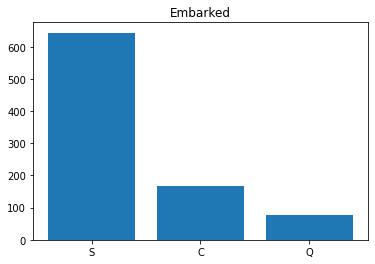

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
x = train['Embarked'].value_counts().index
y = train['Embarked'].value_counts()

plt.bar(x,y)
plt.title('Embarked')
plt.show()
y

In [8]:
train['Embarked'] = train['Embarked'].fillna('S') # Nan value 를 S로 대체
train['Embarked'].isnull().sum() # 대체 확인

0

- --
# Missing Value Solution

### (2/4). Fare
- test[Fare] has 1 missing value <br> 작은 규모이기 때문에 평균으로 대체

In [9]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean()) # Fare 의 평균으로 대체
test['Fare'].isnull().sum() # 대체 확인

0

- --
# Missing Value Solution

### (3/4). Age
- train[Age] has 177 missing value <br> test[Age] has 86 missing value <br> Age 를 추론할 수 있는 Feature 를 사용해 결측지를 대체<br/>- 

- 결측지 대체 방안
1. correlation 이 가장 높은 Pclass 사용
2. Name 의 Title 을 사용 (채택)

In [10]:
train_and_test = [train, test]

In [11]:
for ds in train_and_test:
    ds['Title'] = ds.Name.str.extract(' ([A-Za-z]+)\.') # 정규 표현식을 이용해 Title 추출

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [12]:
train['Title'].value_counts() # 어떤 value 가 있는지 확인

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [13]:
test['Title'].value_counts() # 어떤 value 가 있는지 확인

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [14]:
for ds in train_and_test:
    ds['Title'] = ds['Title'].replace(['Countess','Lady','Mlle','Mme','Capt', 'Col','Dona','Don','Dr','Major','Dr','Jonkheer','Major','Rev','Sir'], 'Others')
    ds['Title'] = ds['Title'].replace('Ms','Miss') # Ms 와 Miss 는 차이가 없다고 한다.

In [15]:
train['Title'].value_counts() # 대체 확인

Mr        517
Miss      183
Mrs       125
Master     40
Others     26
Name: Title, dtype: int64

In [16]:
test['Title'].value_counts() # 대체 확인

Mr        240
Miss       79
Mrs        72
Master     21
Others      6
Name: Title, dtype: int64

In [17]:
train[['Title','Age']].groupby(['Title']).mean().index

Index(['Master', 'Miss', 'Mr', 'Mrs', 'Others'], dtype='object', name='Title')

In [18]:
for ds in train_and_test: 
    ds['Age'] = ds['Age'].fillna('Nan') # 결측지 대체를 위한 작업

In [19]:
""" Title_list = ds[['Title','Age']].groupby(['Title']).mean().index # 타이틀 종류
Age_list = ds[['Title','Age']].groupby(['Title']).mean() # 타이틀 별 평균 나이

for ds in train_and_test:
    for i,j in zip(Title_list, Age_list):
        ds.loc[(train['Title'] == i) & (ds['Age'] == 'Nan'), 'Age'] = j """

        # 코드에 문제가 있음 아래로 대체

" Title_list = ds[['Title','Age']].groupby(['Title']).mean().index # 타이틀 종류\nAge_list = ds[['Title','Age']].groupby(['Title']).mean() # 타이틀 별 평균 나이\n\nfor ds in train_and_test:\n    for i,j in zip(Title_list, Age_list):\n        ds.loc[(train['Title'] == i) & (ds['Age'] == 'Nan'), 'Age'] = j "

In [20]:
title_list = ['Master', 'Miss', 'Mr', 'Mrs', 'Others']
Age = [4.57, 21.81, 32.36, 35.89, 42.96]
for ds in train_and_test:
    for i,j in zip(title_list, Age):
        ds.loc[(train['Title'] == i) & (ds['Age'] == 'Nan'), 'Age'] = j

- --
# Missing Value Solution

### (4/4). Cabin
- train[Cabin] has 687 missing value <br> test[Cabin] has 327 missing value <br> 결측지 상당히 많음 <br> -

- 일단 cabin 이 어떤 의미인줄 몰라 검색 시도 <br> cabin 에 대한 정보를 볼 수 있는 사이트 http://ssmaritime.com/Titanic-3.htm  <br> -

- 알게된 정보 <br> Cabin Value 는 알파벳 1개와 숫자 2~3개의 조합 ex) C132 <br> 알파벳은 deck(층) 을 의미 / 숫자는 호실을 의미 <br> -

- 결측지 대체 방안

1. Cabin 의 deck 을 의미하는 알파벳은 Fare/Pclass 와 관련있을 가능성이 높다. (가설) <br> 이를 분석해 대체 <br> (추후 새로운 Feature를 만들 때 사용)
2. Cabin 을 가진사람과 가지지 않은 사람으로 나눔 (채택)



In [21]:
for ds in train_and_test:
    ds['Cabin_isin'] = ds.Cabin.str.extract('([A-Z])') # cabin value 의 첫 알파벳 추출

for ds in train_and_test:
    ds['Cabin_isin'] = ds['Cabin_isin'].replace(['A','B','C','D','E','F','G','T'],'Y') # cabin value 가 있으면 Y으로 대체

In [22]:
for ds in train_and_test:
    ds['Cabin_isin'] = ds['Cabin_isin'].fillna('N') # cabin value 가 없으면 N으로 대체

In [23]:
train['Cabin_isin'].value_counts() # 대체 확인

N    687
Y    204
Name: Cabin_isin, dtype: int64

In [24]:
test['Cabin_isin'].value_counts() # 대체 확인

N    327
Y     91
Name: Cabin_isin, dtype: int64

- --
# Zero Value Solution

### (1/1). Fare
- train[Fare] has 15 Zero value <br> test[Fare] has 2 Zero value <br> Fare 평균으로 대체 <br>


In [25]:
for ds in train_and_test:
    ds['Fare'] = ds['Fare'].replace(0, ds['Fare'].mean())

In [26]:
train['Fare'].isin([0]).sum() # 대체 확인

0

In [27]:
test['Fare'].isin([0]).sum() # 대체 확인

0

In [28]:
train.to_csv('../Data/trainPrePro1.csv', index=False)
test.to_csv('../Data/testPrePro1.csv', index=False)

- --

# Done

- 다음장에서 수행할 일 <br> 1. 추가적인 Feature 고려 <br>  2. 로지스틱 회귀 모델에 알맞은 전처리를 진행